In [1]:
import numpy as np # linear algebra

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('lung_cancer_mortality_data_large_v2.csv')

In [4]:
df1.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [5]:
df1.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived'],
      dtype='object')

In [6]:
df1.shape

(3250000, 18)

In [7]:
df1.size

58500000

In [8]:
# check for unique values
df1['treatment_type'].unique()

array(['Combined', 'Radiation', 'Surgery', 'Chemotherapy'], dtype=object)

In [9]:
# check for duplicates
df1.duplicated().sum()

0

In [10]:
# check for missing values
df1.isna().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [11]:
# check the data types
df1.dtypes

id                               int64
age                            float64
gender                          object
country                         object
diagnosis_date                  object
cancer_stage                    object
beginning_of_treatment_date     object
family_history                  object
smoking_status                  object
bmi                            float64
cholesterol_level                int64
hypertension                     int64
asthma                           int64
cirrhosis                        int64
other_cancer                     int64
treatment_type                  object
end_treatment_date              object
survived                         int64
dtype: object

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   age                          float64
 2   gender                       object 
 3   country                      object 
 4   diagnosis_date               object 
 5   cancer_stage                 object 
 6   beginning_of_treatment_date  object 
 7   family_history               object 
 8   smoking_status               object 
 9   bmi                          float64
 10  cholesterol_level            int64  
 11  hypertension                 int64  
 12  asthma                       int64  
 13  cirrhosis                    int64  
 14  other_cancer                 int64  
 15  treatment_type               object 
 16  end_treatment_date           object 
 17  survived                     int64  
dtypes: float64(2), int64(7), object(9)
memory 

In [13]:
df1.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06
mean,1.625000e+06,5.499969e+01,3.049276e+01,2.336376e+02,7.498375e-01,4.687280e-01,2.265831e-01,8.802738e-02,2.196006e-01
std,9.381943e+05,1.000122e+01,8.371494e+00,4.344851e+01,4.331065e-01,4.990212e-01,4.186206e-01,2.833348e-01,4.139761e-01
min,1.000000e+00,4.000000e+00,1.600000e+01,1.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.125008e+05,4.800000e+01,2.320000e+01,1.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.625000e+06,5.500000e+01,3.050000e+01,2.420000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.437500e+06,6.200000e+01,3.770000e+01,2.710000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.250000e+06,1.040000e+02,4.500000e+01,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
# make a copy in order not to tamper with the original dataset
df = df1.copy()

In [15]:
# Convert date columns to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

In [16]:
# convert age data type to integer
df['age'] = df['age'].astype(int)

In [17]:
# re-check data types
df.dtypes

id                                      int64
age                                     int32
gender                                 object
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                           object
beginning_of_treatment_date            object
family_history                         object
smoking_status                         object
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                         object
end_treatment_date             datetime64[ns]
survived                                int64
dtype: object

In [18]:
# Display dataframe
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [19]:
# create a new column and calculate number of days under treatment
df['days_under_treatment'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

In [20]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_under_treatment
0,1,64,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,587
1,2,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,369
2,3,65,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,704
3,4,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,432
4,5,37,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,294


In [21]:
df.dtypes

id                                      int64
age                                     int32
gender                                 object
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                           object
beginning_of_treatment_date            object
family_history                         object
smoking_status                         object
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                         object
end_treatment_date             datetime64[ns]
survived                                int64
days_under_treatment                    int64
dtype: object

In [22]:
# map all columns with 'Yes' and 'No' to 1 and 0 in order to be recognised by our algorithm
df['hypertension'] = df['hypertension'].map({'Yes': 1, 'No': 0})
df['asthma'] = df['asthma'].map({'Yes': 1, 'No': 0})
df['cirrhosis'] = df['cirrhosis'].map({'Yes': 1, 'No': 0})
df['other_cancer'] = df['other_cancer'].map({'Yes': 1, 'No': 0})
df['survived'] = df['survived'].map({'Yes': 1, 'No': 0})
df['family_history'] = df['family_history'].map({'Yes': 1, 'No': 0})

In [23]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['cancer_stage'] = df['cancer_stage'].map({'Stage I': 1, 'Stage II': 2, 'Stage III':3, 'Stage IV':4})
df['treatment_type'] = df['treatment_type'].map({'Chemotherapy': 1, 'Combined': 2, 'Radiation':3, 'Surgery':4})
df['smoking_status'] = df['smoking_status'].map({'Current Smoker': 1, 'Former Smoker': 2, 'Never Smoked':3, 'Passive Smoker':4})

In [24]:
df.dtypes

id                                      int64
age                                     int32
gender                                  int64
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                            int64
beginning_of_treatment_date            object
family_history                          int64
smoking_status                          int64
bmi                                   float64
cholesterol_level                       int64
hypertension                          float64
asthma                                float64
cirrhosis                             float64
other_cancer                          float64
treatment_type                          int64
end_treatment_date             datetime64[ns]
survived                              float64
days_under_treatment                    int64
dtype: object

In [25]:
df['survived'] = df1['survived']

In [26]:
print(df['survived'].value_counts())

survived
0    2536298
1     713702
Name: count, dtype: int64


In [27]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['survived']==0)] 
df_minority = df[(df['survived']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2536298, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [28]:
print(df_upsampled['survived'].value_counts())

survived
1    2536298
0    2536298
Name: count, dtype: int64


In [29]:
# Exclude the columns 'diagnosis_date', 'end_treatment_date', 'country', 'id', and 'survived'
X = df_upsampled[['age', 'gender', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'days_under_treatment']]
y = df_upsampled['survived']

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

predicted_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Initialize variables
step_factor = 0.05
threshold_values = np.arange(0.2, 0.81, step_factor)
roc_scores = []

# Iterate over each threshold and calculate the ROC AUC score
for threshold in threshold_values:
    predicted = (predicted_proba >= threshold).astype('int')
    roc_score = roc_auc_score(y_test, predicted)
    print(f'Threshold {threshold:.2f} -- ROC AUC: {roc_score:.4f}')
    roc_scores.append(roc_score)

# Find the best threshold
best_index = np.argmax(roc_scores)
best_threshold = threshold_values[best_index]
best_roc_score = roc_scores[best_index]

print(f'--- Optimum Threshold --- {best_threshold:.2f} -- ROC AUC: {best_roc_score:.4f}')

# Apply the best threshold to make final classifications
final_predictions = (predicted_proba >= best_threshold).astype('int')

# Evaluate the final classifications
final_accuracy = accuracy_score(y_test, final_predictions)
print(f'Final accuracy with optimal threshold {best_threshold:.2f}: {final_accuracy:.4f}')

Threshold 0.20 -- ROC AUC: 0.5491
Threshold 0.25 -- ROC AUC: 0.6199
Threshold 0.30 -- ROC AUC: 0.7114
Threshold 0.35 -- ROC AUC: 0.8004
Threshold 0.40 -- ROC AUC: 0.8703
Threshold 0.45 -- ROC AUC: 0.9169
Threshold 0.50 -- ROC AUC: 0.9440
Threshold 0.55 -- ROC AUC: 0.9581
Threshold 0.60 -- ROC AUC: 0.9648
Threshold 0.65 -- ROC AUC: 0.9660
Threshold 0.70 -- ROC AUC: 0.9563
Threshold 0.75 -- ROC AUC: 0.9313
Threshold 0.80 -- ROC AUC: 0.9046
--- Optimum Threshold --- 0.65 -- ROC AUC: 0.9660
Final accuracy with optimal threshold 0.65: 0.9660


In [32]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[505033   2471]
 [ 32007 475009]]


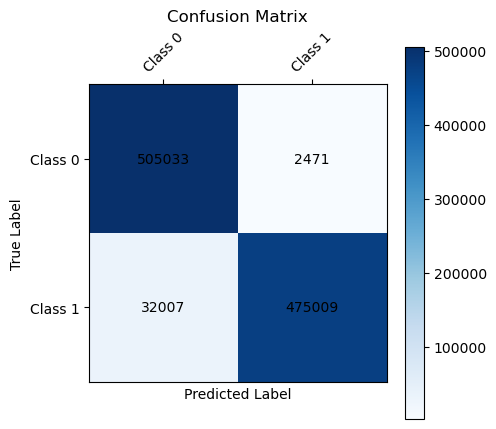

In [33]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.matshow(conf_matrix, cmap=plt.cm.Blues)  # Use a colormap for better visualization
plt.colorbar()

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Add ticks with class labels (assuming you have class labels stored somewhere)
plt.tick_params(bottom=False)  # Remove x-axis tick labels (predicted labels are shown on the top)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels
plt.xticks(range(len(class_labels)), class_labels, rotation=45)
plt.yticks(range(len(class_labels)), class_labels)

# Add values to each cell (optional)
for i in range(len(conf_matrix)):
  for j in range(len(conf_matrix[0])):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, final_predictions)

# Print the MSE
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.03


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)

# Extract TP, TN, FP, FN
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)

# Calculate specificity
specificity = TN / (TN + FP)

# Calculate R² score
r2 = r2_score(y_test, final_predictions)

# Print metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'R² Score: {r2:.4f}')


Precision: 0.9948
Recall: 0.9369
F1 Score: 0.9650
Specificity: 0.9951
R² Score: 0.8641


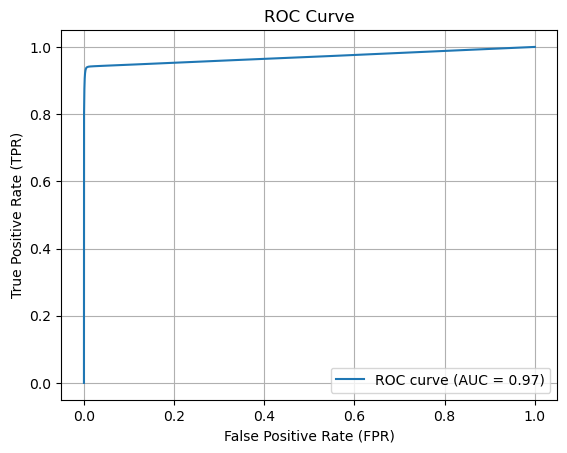

In [36]:
from sklearn.metrics import roc_curve

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba)

# Optional: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, predicted_proba))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [37]:
from joblib import dump

# Save the model
dump(rf_model, 'lung_cancer_survival_model.joblib')
print("Model saved as lung_cancer_survival_model.joblib")


Model saved as lung_cancer_survival_model.joblib
